In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import pandas as pd

In [2]:
resultI = pd.read_csv("Result/Ind_inf_u0.03_M1.1_st500_N1000_v0.2_LD0_alg0_0.csv")

In [15]:
rW = np.array(resultI["WCCn"][range(0,len(resultI),100)])
rT = np.array(resultI["Time"][range(0,len(resultI),100)])

#n=np.arange(192)+0.3
#for ind in :
 #   plt.plot()
#plt.show()

In [16]:
rP = [[],[]]
count=0
for i in range(len(rW)):
    try:
        a=np.append(np.mat(rW[i]),np.mat(rT[i]),axis=0)
        rP = np.append(rP,a,axis=1)
    except:
        count+=1
        print(count)

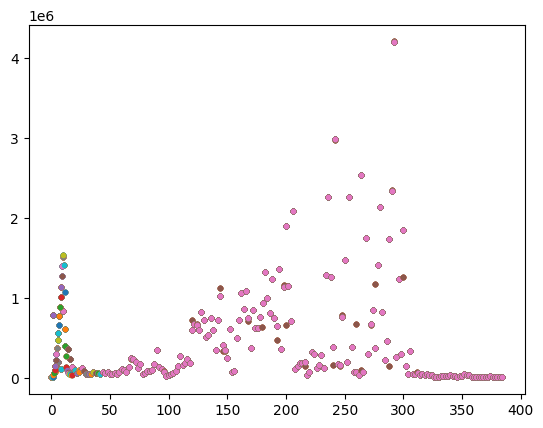

In [17]:
plt.plot(rP[1],rP[0],'.')

plt.show()

matrix([[3380.4942, 3375.9626, 3380.4942, 3380.4942, 3375.9626,
         3380.4942, 3380.4942, 3380.4942, 3375.9626, 3380.4942,
         3380.4942, 3380.4942, 3380.4942, 3375.9626, 3380.4942,
         3380.4942, 3380.4942, 3380.4942, 3380.4942, 3375.9626,
         3380.4942, 3380.4942, 3380.4942, 3380.4942, 3380.4942,
         3380.4942, 3375.9626, 3380.4942, 3380.4942, 3380.4942,
         3380.4942, 3380.4942, 3380.4942, 3380.4942, 3375.9626,
         3380.4942, 3380.4942, 3380.4942, 3380.4942, 3380.4942,
         3380.4942, 3380.4942, 3380.4942, 3375.9626, 3380.4942,
         3380.4942, 3380.4942, 3380.4942, 3380.4942, 3380.4942,
         3380.4942, 3380.4942, 3380.4942, 3375.9626, 3380.4942,
         3380.4942, 3380.4942, 3380.4942, 3380.4942, 3380.4942,
         3380.4942, 3380.4942, 3380.4942, 3380.4942, 3375.9626,
         3380.4942, 3380.4942, 3380.4942, 3380.4942, 3380.4942,
         3380.4942, 3380.4942, 3380.4942, 3380.4942, 3380.4942,
         3380.4942, 3375.9626, 3380.4942